<a href="https://colab.research.google.com/github/mohammad-rakibul-alam/Cats-and-Dogs-Classification-Using-CNN/blob/main/Cats_and_Dogs_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**We will classify cats and dogs images using convolutional neural network**

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import os

#Accuracy measurement
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle


#Visualaization
import seaborn as sns
import matplotlib.pyplot as plt


#Model Module
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Flatten
from tensorflow.keras import backend as bk

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adamax
from tensorflow.keras.models import Sequential


from tqdm import tqdm
import cv2

In [6]:
classNames = ["cats", 'dogs']
classNameslabels = {classnames: i for i, classnames in enumerate(classNames)}

In [7]:
print(classNameslabels)

{'cats': 0, 'dogs': 1}


In [8]:
print(len(classNameslabels))

2


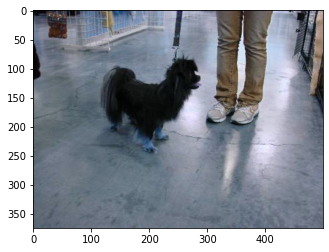

In [9]:
#Showing the image
imageData = cv2.imread("/content/drive/My Drive/dataset/training_set/dogs/dog.1000.jpg")
plt.imshow(imageData)
plt.show()

In [10]:
print(imageData.shape)

(375, 499, 3)


In [11]:
image_shape = (128, 128)

In [12]:
def datasetLoaderFromDirectory():
    #Load datasets from folder
    dataset_path = ["/content/drive/My Drive/dataset/training_set/", "/content/drive/My Drive/dataset/test_set/"]
    #Store data into the list with their paths
    imageDataOutput = []
    # Tag each data path file
    for i in dataset_path:
        #List for image ata
        images = []
        #list for class names
        labels = []
        print("Counting : {}".format(i))

            
        for j in os.listdir(i):
            label = classNameslabels[j]
            for imagedatafile in tqdm(os.listdir(os.path.join(i, j))):
                
                imagePath = os.path.join(os.path.join(i, j), imagedatafile)
                
                #image Read & Preprocessing
                image = cv2.imread(imagePath)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_shape)
                
                #print("Images: ", image)
                
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = "float32")
        labels = np.array(labels, dtype = 'float32')
        #print(images)
        imageDataOutput.append((images, labels))
    
    return imageDataOutput

In [13]:
(train_image, train_labels), (test_image, test_labels) = datasetLoaderFromDirectory()

Counting : /content/drive/My Drive/dataset/training_set/


100%|██████████| 4000/4000 [01:12<00:00, 54.89it/s] 


Counting : /content/drive/My Drive/dataset/test_set/


100%|██████████| 1000/1000 [00:16<00:00, 60.53it/s]


In [14]:
train_images, train_labels = shuffle(train_image, train_labels, random_state = 42)

In [15]:
train_labels[5]

1.0

In [16]:
_, trainImageLabelInfo = np.unique(train_labels, return_counts=True)
_, testImageLabelInfo = np.unique(test_labels, return_counts = True)

In [17]:
print("Train Image Label information for 0 Class: ", trainImageLabelInfo[0])
print("Train Image Label information for 1 Class: ", trainImageLabelInfo[1])

print("---------------------------------------------------")

print("Test Image Label information for 0 Class: ", testImageLabelInfo[0])
print("Test Image Label information for 1 Class: ", testImageLabelInfo[1])

Train Image Label information for 0 Class:  4000
Train Image Label information for 1 Class:  4000
---------------------------------------------------
Test Image Label information for 0 Class:  1000
Test Image Label information for 1 Class:  1000


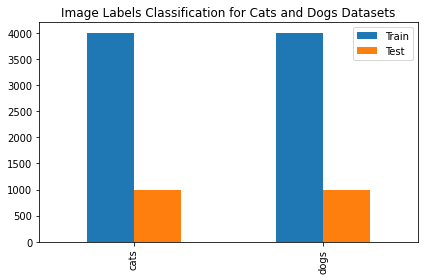

In [18]:
# Creating Dataframe for stroing image labels metadata
# Using Dictionary concept

pd.DataFrame({"Train":trainImageLabelInfo,
            "Test": testImageLabelInfo}, 
             index = classNames
            ).plot.bar()
# plt.plot()
# plt.bar()
plt.title("Image Labels Classification for Cats and Dogs Datasets")
plt.grid(False)
plt.tight_layout()
plt.show()

##Model

In [19]:
# Read one image features
imageFeature = train_images[0] # Image feature value should be in range between [0, 255]
#np.unique(imageFeature)
len(np.unique(imageFeature))

256

In [20]:
# Scaleing image featues 
train_images = train_images/255.0
test_image = test_image/255.0

In [21]:
#train_images[0]
#np.unique(train_images[0])
len(np.unique(train_images[0]))

256

In [22]:
#train_images.shape[0]
#np.random.randint(train_images.shape[0])
train_images.shape # (8000, 128, 128, 3) --> (Number of Image, Image_W, Image_H, Number of Color channle)

(8000, 128, 128, 3)

In [23]:
#train_labels[345]

In [24]:
# Now Read an image after Scalling
def ImageVisualization(classNames, imagePath, imagelabel):
    #Create an index for indivudual Image
    index = np.random.randint(imagePath.shape[0]) # Index always int
    
    plt.figure()# Define Frame size
    plt.imshow(imagePath[index])
    
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.tight_layout()
    
    plt.title("Index of this Image is: {}".format(index) + " And Class is : "+classNames[int(imagelabel[index])])
    plt.show()

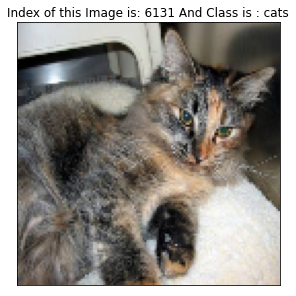

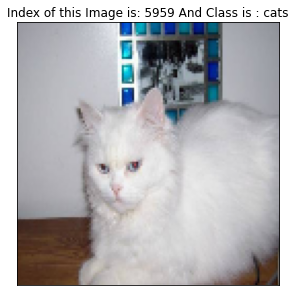

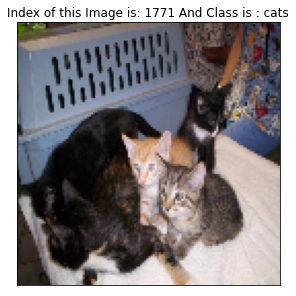

In [25]:
#Image Index & Class Names

for i in range(1, 4):
    ImageVisualization(classNames, train_images, train_labels)

In [30]:
# Visualization of Image at shape of (3, 3)
# Now Read an image after Scalling
def ImageVisualization2(classNames, imagePath, imagelabel):
    
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle("Random Image Visualization", fontsize = 24 )
    
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.tight_layout()
        
        plt.imshow(imagePath[i], cmap = plt.cm.binary)
        plt.xlabel("Class Names: {}".format(classNames[int(imagelabel[i])]))
    plt.show()

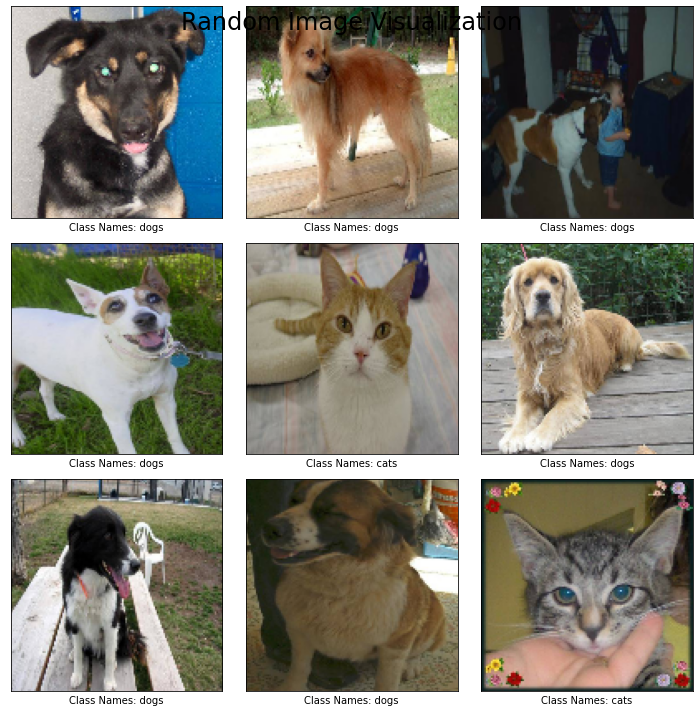

In [31]:
ImageVisualization2(classNames, train_images, train_labels)

In [32]:
train_images.shape

(8000, 128, 128, 3)

In [33]:
model = Sequential([
    
    # Input Layer
    
    Conv2D(32, (3, 3), activation = "relu", input_shape = (128, 128, 3)),
    MaxPooling2D(2, 2),
    
    #1st Hidden Layer

    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
     #2nd Hidden Layer
    
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    #3rd Hidden Layer
    
    Conv2D(256, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
    Flatten(),
    
    # Connected Layer
    
    Dense(256, activation = "relu"),
    Dense(2, activation = "softmax")
])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [35]:
model.compile(optimizer = 'adam',
             loss = "sparse_categorical_crossentropy",
             metrics = ['accuracy'])

In [36]:
modelData = model.fit(train_images,
                     train_labels,
                     epochs = 30,
                     batch_size = 128,
                     validation_split=0.2)

Epoch 1/30
50/50 [==============================] - 125s 2s/step - loss: 0.6960 - accuracy: 0.5472 - val_loss: 0.7042 - val_accuracy: 0.5381
Epoch 2/30
50/50 [==============================] - 122s 2s/step - loss: 0.6441 - accuracy: 0.6137 - val_loss: 0.5976 - val_accuracy: 0.6906
Epoch 3/30
50/50 [==============================] - 122s 2s/step - loss: 0.5914 - accuracy: 0.6809 - val_loss: 0.5644 - val_accuracy: 0.7075
Epoch 4/30
50/50 [==============================] - 122s 2s/step - loss: 0.5536 - accuracy: 0.7212 - val_loss: 0.5600 - val_accuracy: 0.7119
Epoch 5/30
50/50 [==============================] - 121s 2s/step - loss: 0.4997 - accuracy: 0.7545 - val_loss: 0.5159 - val_accuracy: 0.7400
Epoch 6/30
50/50 [==============================] - 121s 2s/step - loss: 0.4647 - accuracy: 0.7750 - val_loss: 0.5476 - val_accuracy: 0.7344
Epoch 7/30
50/50 [==============================] - 123s 2s/step - loss: 0.4252 - accuracy: 0.8069 - val_loss: 0.4845 - val_accuracy: 0.7781
Epoch 8/30
50

In [37]:
def accuracy_and_loss_Plot(modelData):
    
    fig = plt.figure(figsize = (10, 10))
    
    plt.subplot(221)
    plt.plot(modelData.history["accuracy"], 'bo--', label = 'accuracy')
    plt.plot(modelData.history["val_accuracy"], 'ro--', label = 'val_accuracy')
    plt.title("Training Data Accuracy Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    
    
    plt.subplot(222)
    plt.plot(modelData.history["loss"], 'bo--', label = 'loss')
    plt.plot(modelData.history["val_loss"], 'ro--', label = 'val_loss')
    plt.title("Training Data Loss Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.show()

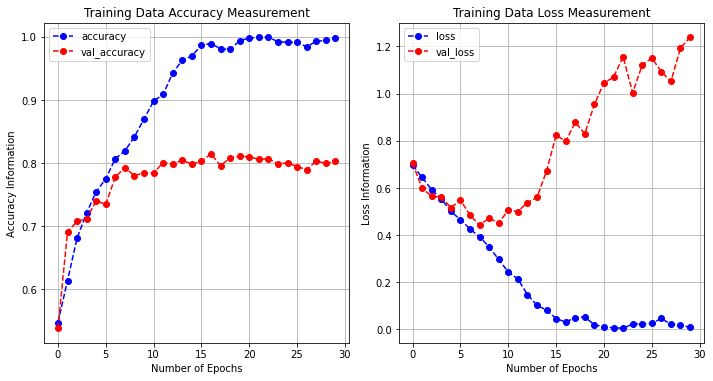

In [38]:
accuracy_and_loss_Plot(modelData)

**Loss / Accuracy in one graph**

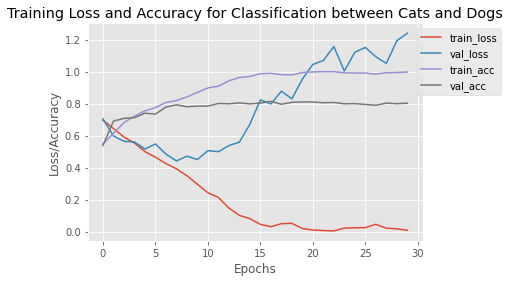

In [39]:
#loss/accuracy graph
n=30
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, n), modelData.history["loss"], label="train_loss")
plt.plot(np.arange(0, n), modelData.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n), modelData.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n), modelData.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy for Classification between Cats and Dogs")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))

In [41]:
testLoss = model.evaluate(test_image, test_labels)


63/63 [==============================] - 9s 147ms/step - loss: 1.2730 - accuracy: 0.8100


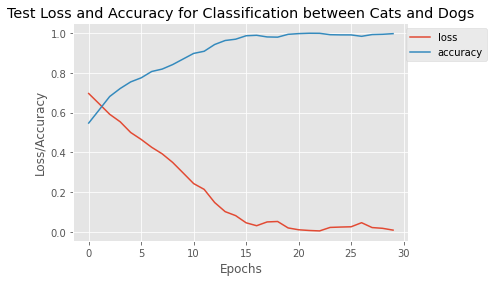

In [65]:
#Test loss/accuracy graph
n=30
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, n), modelData.history["loss"], label="loss")
plt.plot(np.arange(0, n), modelData.history["accuracy"], label="accuracy")
plt.title("Test Loss and Accuracy for Classification between Cats and Dogs")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))

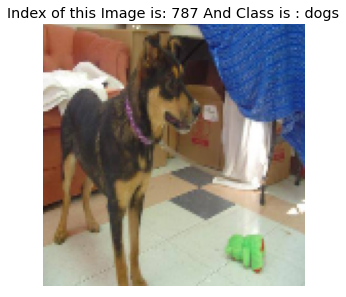

In [45]:
#Predicting random image with index & class
predictedData = model.predict(test_image)
predictedDataLabels = np.argmax(predictedData, axis = 1)
ImageVisualization(classNames, test_image, predictedDataLabels)

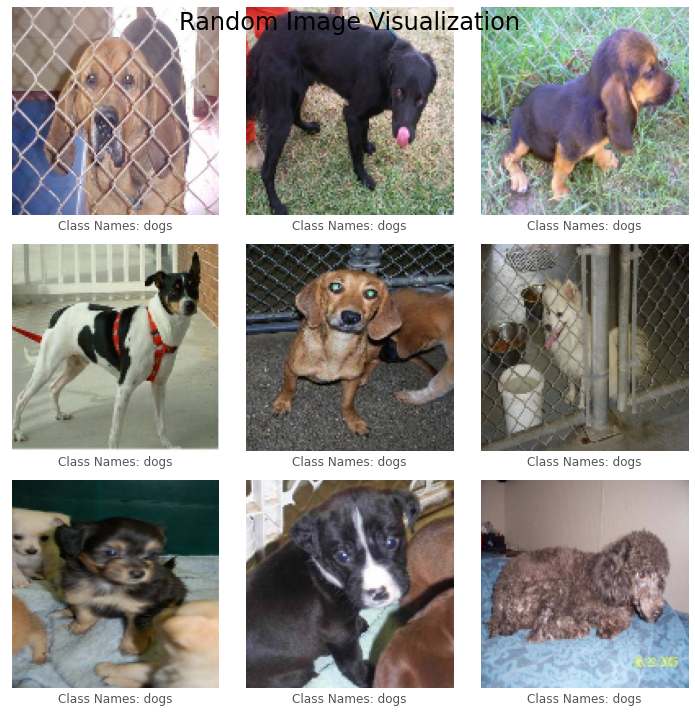

In [46]:
ImageVisualization2(classNames, test_image, test_labels)

In [54]:
cm = tf.math.confusion_matrix(labels=test_labels, predictions=predictedDataLabels)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[778, 222],
       [158, 842]], dtype=int32)>

Text(69.0, 0.5, 'Actual')

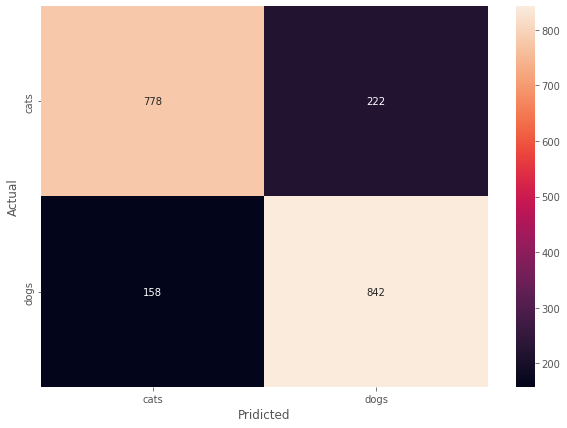

In [64]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d', 
           xticklabels=classNames,
           yticklabels=classNames)
plt.xlabel('Pridicted')
plt.ylabel('Actual')